Data Source : https://nsrdb.nrel.gov/  \
City choosen for analysis: Cocoa Florida, Golden Colorado,Eugene Oregon \
Time Range: 2013-01 to 2014-01


Response variable: GHI \
Explanatory Variable: Cloud Type, Temperature


Purpose of Analysis: Find out if GHI (Global Horizontal Irradiance) has correlation with Temperature and Weather. \
Since it's hard to categorized Weather directly from given source, We choose an variable "Cloud Type" from raw table and estabilish analysis to show GHI's Fluctuation response to different type of cloud.
See below table for Cloud Type index use in this study and the detail explaination



| Cloud Type Index |0| 1| 2| 3| 4| 5| 6| 7| 8| 9|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Explaination| Clear | Probably Clear | Fog | Water | Super-Cooled Water | Mixed | Opaque Ice | Cirrus | Overlapping | Overshooting| Probably Clear |

In [117]:
#Data import
import pandas as pd


CF = pd.read_csv("Data Folder/Cocoa_Florida_2013.csv", skiprows=2)
EO = pd.read_csv("Data Folder/Eugene_Oregon_2013.csv", skiprows=2)
GC = pd.read_csv("Data Folder/Golden_Colorado_2013.csv", skiprows=2)
print(CF)
print(EO)
print(GC)


      Year  Month  Day  Hour  Minute  Temperature  DHI  DNI  Cloud Type  GHI
0     2013      1    1     0      30         16.6    0    0           0    0
1     2013      1    1     1      30         16.3    0    0           0    0
2     2013      1    1     2      30         16.1    0    0           1    0
3     2013      1    1     3      30         15.8    0    0           3    0
4     2013      1    1     4      30         15.6    0    0           1    0
...    ...    ...  ...   ...     ...          ...  ...  ...         ...  ...
8755  2013     12   31    19      30         17.9    0    0           7    0
8756  2013     12   31    20      30         17.5    0    0           3    0
8757  2013     12   31    21      30         17.2    0    0           1    0
8758  2013     12   31    22      30         17.0    0    0           0    0
8759  2013     12   31    23      30         16.8    0    0           0    0

[8760 rows x 10 columns]
      Year  Month  Day  Hour  Minute  Temperature 

In [9]:
# Data Cleaning
CF["Temperature"] = CF.Temperature.astype(float)
CF["GHI"] = CF.GHI.astype(float)
print(CF.isna().sum())


GC["Temperature"] = GC.Temperature.astype(float)
GC["GHI"] = GC.GHI.astype(float)
print(GC.isna().sum())


EO["Temperature"] = EO.Temperature.astype(float)
EO["GHI"] = EO.GHI.astype(float)
print(EO.isna().sum())

# confirmed data is clean.

Year           0
Month          0
Day            0
Hour           0
Minute         0
Temperature    0
DHI            0
DNI            0
Cloud Type     0
GHI            0
dtype: int64
Year           0
Month          0
Day            0
Hour           0
Minute         0
Temperature    0
Cloud Type     0
GHI            0
DHI            0
DNI            0
dtype: int64
Year           0
Month          0
Day            0
Hour           0
Minute         0
Temperature    0
DHI            0
DNI            0
Cloud Type     0
GHI            0
dtype: int64


In [11]:
#head & tail
print(f"HEAD:\n {CF.head(3)}")
print(f"TAIL:\n {CF.tail(3)}")
print(f"HEAD:\n {GC.head(3)}")
print(f"TAIL:\n {GC.tail(3)}")
print(f"HEAD:\n {EO.head(3)}")
print(f"TAIL:\n {EO.tail(3)}")

HEAD:
    Year  Month  Day  Hour  Minute  Temperature  DHI  DNI  Cloud Type  GHI
0  2013      1    1     0      30         16.6    0    0           0  0.0
1  2013      1    1     1      30         16.3    0    0           0  0.0
2  2013      1    1     2      30         16.1    0    0           1  0.0
TAIL:
       Year  Month  Day  Hour  Minute  Temperature  DHI  DNI  Cloud Type  GHI
8757  2013     12   31    21      30         17.2    0    0           1  0.0
8758  2013     12   31    22      30         17.0    0    0           0  0.0
8759  2013     12   31    23      30         16.8    0    0           0  0.0
HEAD:
    Year  Month  Day  Hour  Minute  Temperature  Cloud Type  GHI  DHI  DNI
0  2013      1    1     0      30        -11.8           0  0.0    0    0
1  2013      1    1     1      30        -11.9           0  0.0    0    0
2  2013      1    1     2      30        -12.2           0  0.0    0    0
TAIL:
       Year  Month  Day  Hour  Minute  Temperature  Cloud Type  GHI  DHI 

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Temperature and GHI
#### To exploring correlationship between temperature and GHI, we start with the first question:
#### How does GHI and Temperature change among the entire year 2013?

##### To Answer the above question, we design time series plotting of GHI and temperature as below

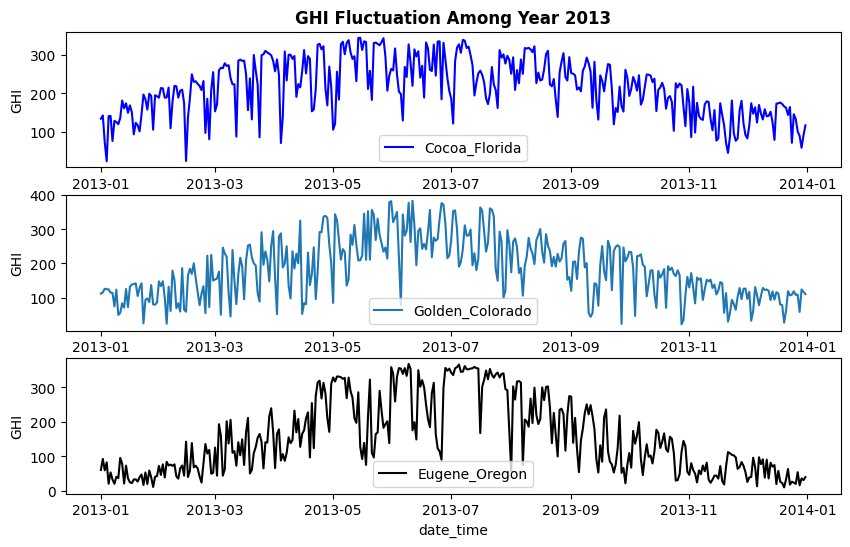

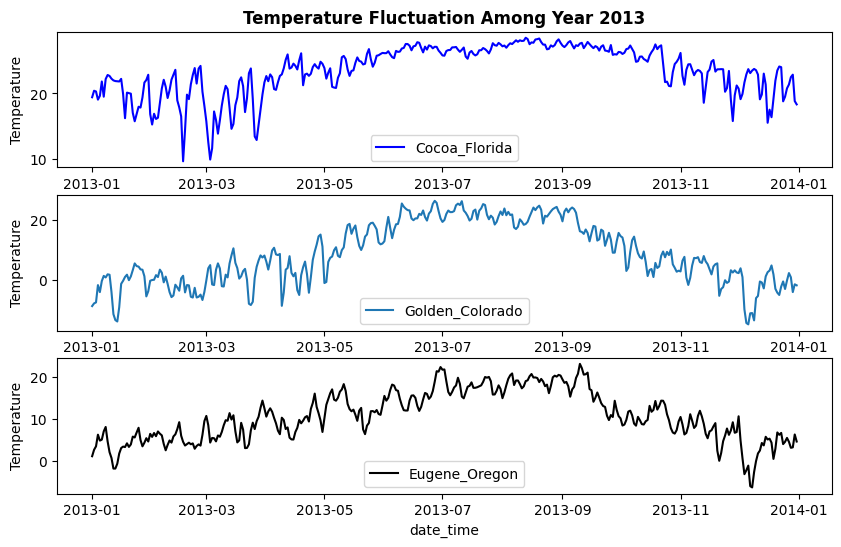

In [95]:


import datetime

CF["Year"] = CF.Year.astype(int)
CF["Month"] = CF.Month.astype(int)
CF["Day"] = CF.Day.astype(int)
CF["Hour"] = CF.Hour.astype(int)

GC["Year"] = GC.Year.astype(int)
GC["Month"] = GC.Month.astype(int)
GC["Day"] = GC.Day.astype(int)
GC["Hour"] = GC.Hour.astype(int)

EO["Year"] = EO.Year.astype(int)
EO["Month"] = EO.Month.astype(int)
EO["Day"] = EO.Day.astype(int)
EO["Hour"] = EO.Hour.astype(int)



fig, axes = plt.subplots(3, 1, figsize=(10, 6))

CF['DateTime'] = CF[['Year','Month','Day']].apply(lambda s : datetime.datetime(*s),axis = 1)
df1 = CF.groupby("DateTime")['GHI'].mean().reset_index(name='avg')
axes[0].plot(df1['DateTime'], df1['avg'],label = "Cocoa_Florida",color ='b')
axes[0].set_title('GHI Fluctuation Among Year 2013',  fontweight ="bold")
axes[0].set_ylabel("GHI")
axes[0].set_xlabel("date_time")
leg = axes[0].legend(loc='lower center')


GC['DateTime'] = GC[['Year','Month','Day']].apply(lambda s : datetime.datetime(*s),axis = 1)
df2 = GC.groupby("DateTime")['GHI'].mean().reset_index(name='avg')
axes[1].plot(df2['DateTime'], df2['avg'],label = "Golden_Colorado")
axes[1].set_ylabel("GHI")
axes[1].set_xlabel("date_time")
leg = axes[1].legend(loc='lower center')


EO['DateTime'] = EO[['Year','Month','Day']].apply(lambda s : datetime.datetime(*s),axis = 1)
df3 = EO.groupby("DateTime")['GHI'].mean().reset_index(name='avg')
axes[2].plot(df3['DateTime'], df3['avg'],label = "Eugene_Oregon",color = 'k')
axes[2].set_ylabel("GHI")
axes[2].set_xlabel("date_time")
leg = axes[2].legend(loc='lower center')



########################################################################################################3

fig, axes = plt.subplots(3, 1, figsize=(10, 6))

CF['DateTime'] = CF[['Year','Month','Day']].apply(lambda s : datetime.datetime(*s),axis = 1)
df1 = CF.groupby("DateTime")['Temperature'].mean().reset_index(name='avg')
axes[0].plot(df1['DateTime'], df1['avg'],label = "Cocoa_Florida",color ='b')
axes[0].set_title('Temperature Fluctuation Among Year 2013',  fontweight ="bold")
axes[0].set_ylabel("Temperature")
axes[0].set_xlabel("date_time")
leg = axes[0].legend(loc='lower center')


GC['DateTime'] = GC[['Year','Month','Day']].apply(lambda s : datetime.datetime(*s),axis = 1)
df2 = GC.groupby("DateTime")['Temperature'].mean().reset_index(name='avg')
axes[1].plot(df2['DateTime'], df2['avg'],label = "Golden_Colorado")
axes[1].set_ylabel("Temperature")
axes[1].set_xlabel("date_time")
leg = axes[1].legend(loc='lower center')


EO['DateTime'] = EO[['Year','Month','Day']].apply(lambda s : datetime.datetime(*s),axis = 1)
df3 = EO.groupby("DateTime")['Temperature'].mean().reset_index(name='avg')
axes[2].plot(df3['DateTime'], df3['avg'],label = "Eugene_Oregon",color = 'k')
axes[2].set_ylabel("Temperature")
axes[2].set_xlabel("date_time")
leg = axes[2].legend(loc='lower center')


# Similar trend:
# How about one day

##### Among entire year, highest GHI happened around 2013-05 to 2013-08 
##### Among entire year, highest Temperature happened around 2013-07 to 2013-08 
##### By observing the above graph, we find out that the trend of GHI Fluctuation is similar to Temperature Fluctuation.  


##### It will give us the next question --  
#### How does GHI and Temperature change on one specific day?

In [54]:
# pick up highest GHI day among the year to look up
print(df1.sort_values("avg",ascending=False))
print(df2.sort_values("avg",ascending=False))
print(df3.sort_values("avg",ascending=False))

##Choosing 2013-07-07 for one day analysis

      DateTime         avg
134 2013-05-15  343.875000
133 2013-05-14  343.250000
146 2013-05-27  342.708333
187 2013-07-07  338.458333
128 2013-05-09  337.750000
..         ...         ...
323 2013-11-20   71.041667
362 2013-12-29   59.000000
324 2013-11-21   45.791667
44  2013-02-14   24.666667
3   2013-01-04   24.000000

[365 rows x 2 columns]
      DateTime         avg
161 2013-06-11  383.625000
150 2013-05-31  382.583333
149 2013-05-30  379.208333
159 2013-06-09  377.833333
176 2013-06-26  376.916667
..         ...         ...
353 2013-12-20   26.791667
22  2013-01-23   24.458333
34  2013-02-04   23.541667
269 2013-09-27   22.875000
300 2013-10-28   21.666667

[365 rows x 2 columns]
      DateTime         avg
159 2013-06-09  368.291667
185 2013-07-05  366.375000
188 2013-07-08  361.916667
193 2013-07-13  359.666667
184 2013-07-04  358.916667
..         ...         ...
22  2013-01-23   17.125000
361 2013-12-28   15.958333
339 2013-12-06   13.208333
27  2013-01-28   11.166667
353 201

In [75]:
cf_day = CF.loc[(CF['Month'] == 7) & (CF['Day'] == 7)]
print(cf_day)
#cloud type always 0
gc_day = GC.loc[(GC['Month'] == 7) & (GC['Day'] == 7)]
print(gc_day)
# Cloud type fluctuation 
eo_day = EO.loc[(EO['Month'] == 7) & (EO['Day'] == 7)]
print(eo_day)
#cloud type always 0 

      Year  Month  Day  Hour  Minute  Temperature  DHI  DNI  Cloud Type  \
4488  2013      7    7     0      30         25.4    0    0           0   
4489  2013      7    7     1      30         25.2    0    0           0   
4490  2013      7    7     2      30         25.0    0    0           0   
4491  2013      7    7     3      30         24.9    0    0           0   
4492  2013      7    7     4      30         24.9    0    0           0   
4493  2013      7    7     5      30         25.6    0    0           0   
4494  2013      7    7     6      30         26.7   53  398           0   
4495  2013      7    7     7      30         27.4   79  638           0   
4496  2013      7    7     8      30         27.8   91  764           0   
4497  2013      7    7     9      30         28.2   97  834           0   
4498  2013      7    7    10      30         28.6  109  862           0   
4499  2013      7    7    11      30         28.8  109  888           0   
4500  2013      7    7   

##### We choose Cocoa Florida and Eugene_Oregon for further analysis
##### Reason: To controled cloud type variable and cloud type of selected city in 2013-07-07 keep static at 0

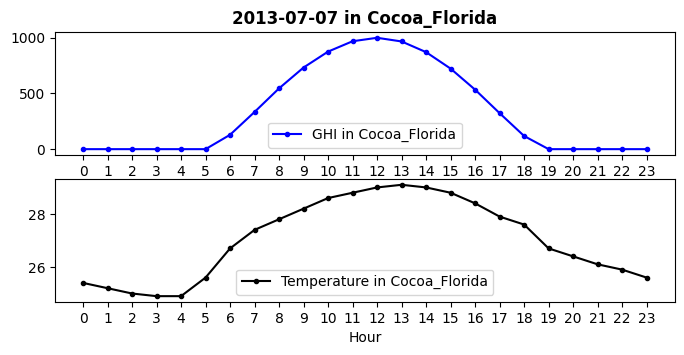

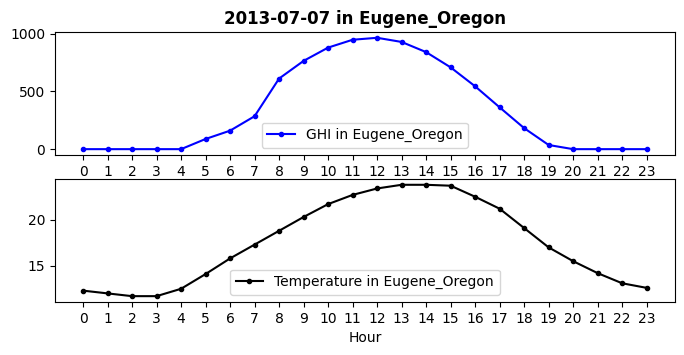

In [91]:
#Cloud type all day 0, specific example:

fig, axes = plt.subplots(2, 1, figsize=(8, 3.5))

df1 = cf_day.groupby("Hour")['GHI'].mean().reset_index(name='avg ghi')
axes[0].plot(df1['Hour'], df1['avg ghi'],label = "GHI in Cocoa_Florida",color ='b',marker=".")
axes[0].set_title('2013-07-07 in Cocoa_Florida',  fontweight ="bold")
axes[0].set_xlabel("Hour")
axes[0].set_xticks(df1['Hour'])
leg = axes[0].legend(loc='lower center')

df2 = cf_day.groupby("Hour")['Temperature'].mean().reset_index(name='avg temp')
axes[1].plot(df2['Hour'], df2['avg temp'],label = "Temperature in Cocoa_Florida",color ='k',marker=".")
axes[1].set_xlabel("Hour")
axes[1].set_xticks(df2['Hour'])
leg = axes[1].legend(loc='lower center')




fig, axes = plt.subplots(2, 1, figsize=(8, 3.5))

df3 = eo_day.groupby("Hour")['GHI'].mean().reset_index(name='avg ghi')
axes[0].plot(df3['Hour'], df3['avg ghi'],label = "GHI in Eugene_Oregon",color ='b',marker=".")
axes[0].set_title('2013-07-07 in Eugene_Oregon',  fontweight ="bold")
axes[0].set_xlabel("Hour")
axes[0].set_xticks(df1['Hour'])
leg = axes[0].legend(loc='lower center')

df4 = eo_day.groupby("Hour")['Temperature'].mean().reset_index(name='avg temp')
axes[1].plot(df4['Hour'], df4['avg temp'],label = "Temperature in Eugene_Oregon",color ='k',marker=".")
axes[1].set_xlabel("Hour")
axes[1].set_xticks(df4['Hour'])
leg = axes[1].legend(loc='lower center')



#### Conclusion: There exist Positive correlation between temperature and GHI

## Cloud Type and GHI
##### Then we consider about the correlation between Cloud Type and GHI
##### We plan to using time range to reduce the bias from temperature's inference in our analysis, we are able to observe the trend of GHI among cloud type level in 4 different months (represent different levels of average temperature) and give an over all evaluation of the correlation.
##### Month chosen: 3 (Spring),6(Summer),9(Fall),12(Winter)

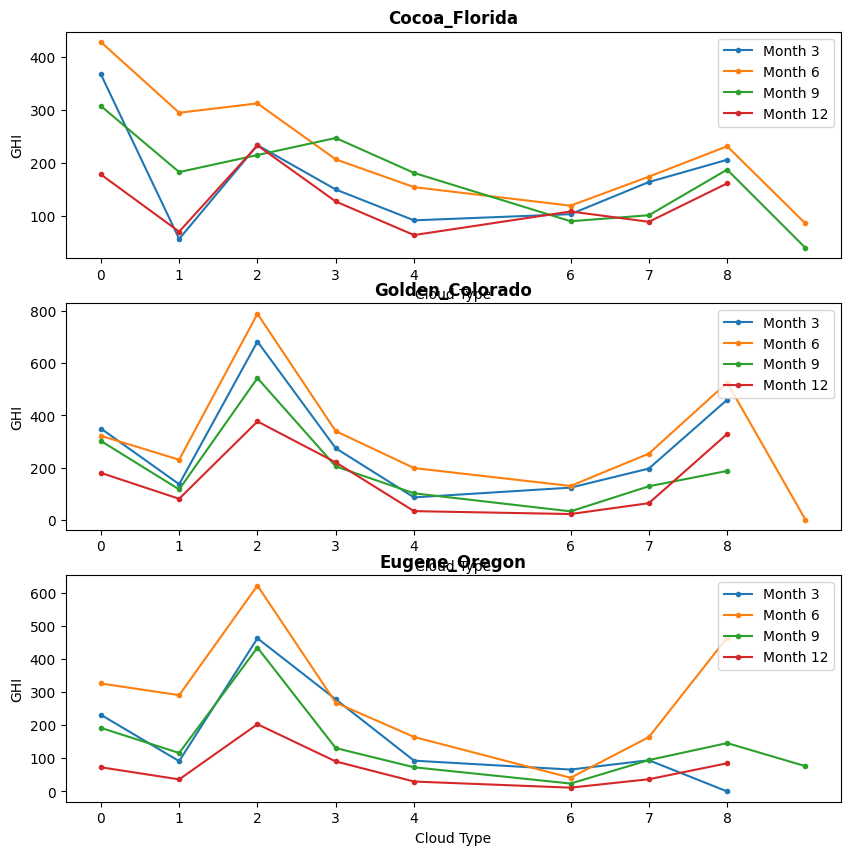

In [113]:
chosen_lst = [3,6,9,12]

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

df1 = CF.groupby(["Month","Cloud Type"])['GHI'].mean().reset_index(name='Avg GHI')

for i in chosen_lst:
    sub = df1.loc[(df1['Month'] == i)]
    axes[0].plot(sub['Cloud Type'], sub['Avg GHI'],label = "Month "+str(i),marker = ".")
    axes[0].set_xticks(sub["Cloud Type"])
    leg = axes[0].legend(loc='upper right')
    axes[0].set_title('Cocoa_Florida',  fontweight ="bold")
    axes[0].set_xlabel("Cloud Type")
    axes[0].set_ylabel("GHI")
    


df2 = GC.groupby(["Month","Cloud Type"])['GHI'].mean().reset_index(name='Avg GHI')

for i in chosen_lst:
    sub = df2.loc[(df2['Month'] == i)]
    axes[1].plot(sub['Cloud Type'], sub['Avg GHI'],label = "Month "+str(i),marker = ".")
    axes[1].set_xticks(sub["Cloud Type"])
    leg = axes[1].legend(loc='upper right')
    axes[1].set_title('Golden_Colorado',  fontweight ="bold")
    axes[1].set_xlabel("Cloud Type")
    axes[1].set_ylabel("GHI")



df3 = EO.groupby(["Month","Cloud Type"])['GHI'].mean().reset_index(name='Avg GHI')
for i in chosen_lst:
    sub = df3.loc[(df3['Month'] == i)]
    axes[2].plot(sub['Cloud Type'], sub['Avg GHI'],label = "Month "+str(i),marker = ".")
    axes[2].set_xticks(sub["Cloud Type"])
    leg = axes[2].legend(loc='upper right')
    axes[2].set_title('Eugene_Oregon',  fontweight ="bold")
    axes[2].set_xlabel("Cloud Type")
    axes[2].set_ylabel("GHI")


# 2,8 got highest
# 6 got lowest

#### From above graph, we find out that even it contains temperature difference, the over all trend of GHI Fluctuation shows that Cloud Type 2 and Cloud Type 8 got highest GHI, and Cloud Type 6 got lowest GHI

## Summarize from observation: 
#### Highest GHI: Cloud Type 2 -- Fog
####              Cloud Type 8 -- Overlapping
#### Lowest GHI:  Cloud Type 6 --Opaque Ic

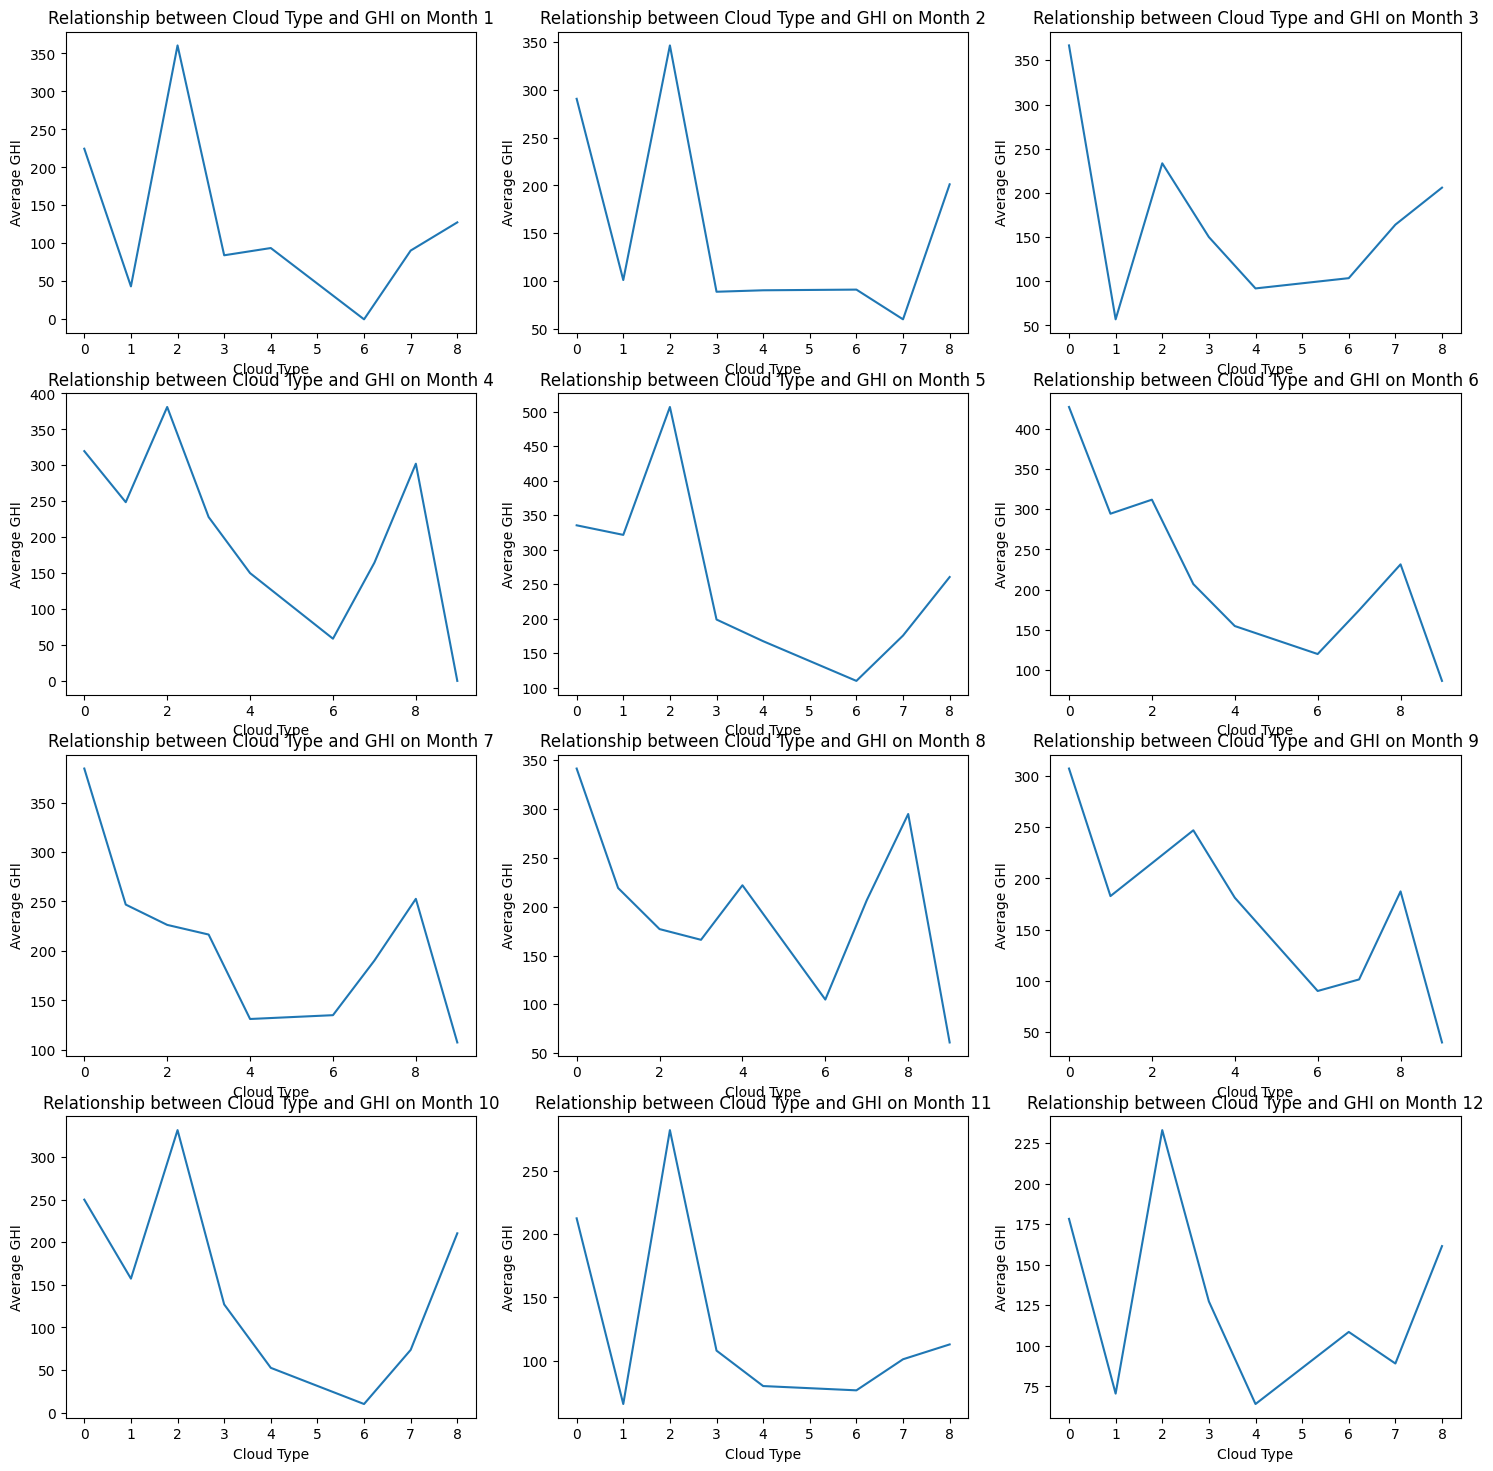

In [116]:
#All 12 months

lst = [1,2,3,4,5,6,7,8,9,10,11,12]

fig = plt.figure(figsize = (18,18))

df1 = CF.groupby(["Month","Cloud Type"])['GHI'].mean().reset_index(name='Avg GHI')
for i in lst:
    plt.subplot(4, 3, int(i))
    sub = df1.loc[(df1['Month'] == i)]
    plt.plot(sub['Cloud Type'], sub['Avg GHI'])
    plt.xlabel('Cloud Type')
    plt.ylabel('Average GHI')
    plt.title("Relationship between Cloud Type and GHI on Month " + str(i))
    
plt.show()